In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


#랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

#그래디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor

#xgboost
import xgboost as xgb

#lightgbm
from lightgbm import LGBMRegressor

from sklearn.metrics import r2_score
import numpy as np

import matplotlib.pyplot as plt

In [159]:
df=pd.read_excel("Pistachio_28_Features_Dataset.xlsx")
df.head()

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,...,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,...,17.7206,19.6024,21.1342,0.4581,0.6635,0.7591,2.9692,3.0576,2.9542,Kirmizi_Pistachio
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,...,26.7061,27.2112,25.1035,-0.3847,-0.2713,-0.2927,1.9807,2.1006,2.2152,Kirmizi_Pistachio
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,...,19.0129,20.0703,20.7006,-0.6014,-0.4500,0.2998,3.5420,3.6856,4.1012,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,...,18.1773,18.7152,29.7883,-0.6943,-0.6278,-0.7798,2.8776,2.8748,2.8953,Kirmizi_Pistachio
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,...,23.4298,24.0878,23.1157,-0.9287,-0.8134,-0.4970,2.9915,2.8813,2.7362,Kirmizi_Pistachio


In [160]:
df=df[['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
       'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness', 'Class']] 

In [161]:
df.head()

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,Roundness,Compactness,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,Kirmizi_Pistachio
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,Kirmizi_Pistachio
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,Kirmizi_Pistachio
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,Kirmizi_Pistachio


In [162]:
#이진분류임
df["Class"].unique()

array(['Kirmizi_Pistachio', 'Siirt_Pistachio'], dtype=object)

In [163]:
#인코딩해주기 위해 series를 input으로 넣으면 명목변수를 숫자로 치환 가능한 함수를 만들어준다
df["Class"]
def encoder(series):
    dic = dict(zip(series.unique(), range(len(series.unique()))))
    result = series.apply(lambda x : dic[x])
    return result

In [164]:
df["Class"] = encoder(df["Class"])
df

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,Roundness,Compactness,Class
0,63391,1568.4050,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0
1,68358,1942.1870,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0
2,73589,1246.5380,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0
3,71106,1445.2610,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0
4,80087,1251.5240,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,85983,1157.1160,444.3447,248.8627,0.8284,330.8730,0.9823,87536,0.6799,1.7855,0.8070,0.7446,1
2144,85691,2327.3459,439.8794,278.9297,0.7732,330.3107,0.8886,96439,0.6590,1.5770,0.1988,0.7509,1
2145,101136,1255.6190,475.2161,271.3299,0.8210,358.8459,0.9888,102286,0.7584,1.7514,0.8061,0.7551,1
2146,97409,1195.2150,452.1823,274.5764,0.7945,352.1718,0.9902,98376,0.7635,1.6468,0.8569,0.7788,1


In [165]:
df.corr()

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,Roundness,Compactness,Class
Area,1.000000,0.115941,0.697782,0.795881,-0.358892,0.997399,0.363959,0.943877,0.331784,-0.424025,0.250423,0.551711,0.589226
Perimeter,0.115941,1.000000,0.094296,0.390740,-0.334483,0.113631,-0.671046,0.364474,-0.403916,-0.312373,-0.891777,0.044624,0.145290
Major_Axis,0.697782,0.094296,1.000000,0.272578,0.298836,0.705333,0.247822,0.661892,0.186830,0.265049,0.153592,-0.201121,0.136845
Minor_Axis,0.795881,0.390740,0.272578,1.000000,-0.816731,0.793155,-0.085556,0.890003,0.047442,-0.839078,-0.066594,0.773512,0.668126
Eccentricity,-0.358892,-0.334483,0.298836,-0.816731,1.000000,-0.352723,0.257060,-0.482713,0.080967,0.943751,0.171669,-0.846851,-0.546759
Eqdiasq,0.997399,0.113631,0.705333,0.793155,-0.352723,1.000000,0.372779,0.940651,0.340073,-0.423318,0.254242,0.549971,0.577300
Solidity,0.363959,-0.671046,0.247822,-0.085556,0.257060,0.372779,1.000000,0.042000,0.678599,0.177830,0.779134,0.226165,0.125347
Convex_Area,0.943877,0.364474,0.661892,0.890003,-0.482713,0.940651,0.042000,1.000000,0.122881,-0.522637,-0.007125,0.515907,0.584618
Extent,0.331784,-0.403916,0.186830,0.047442,0.080967,0.340073,0.678599,0.122881,1.000000,0.023303,0.512278,0.254064,0.100200
Aspect_Ratio,-0.424025,-0.312373,0.265049,-0.839078,0.943751,-0.423318,0.177830,-0.522637,0.023303,1.000000,0.115896,-0.896857,-0.581469


<AxesSubplot:>

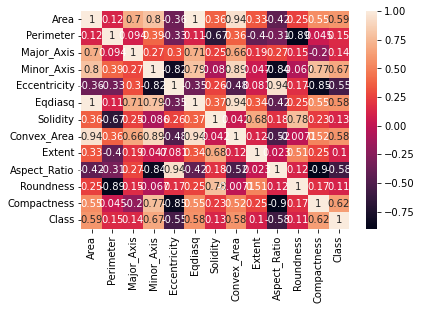

In [166]:
sns.heatmap(df.corr(), annot=True)

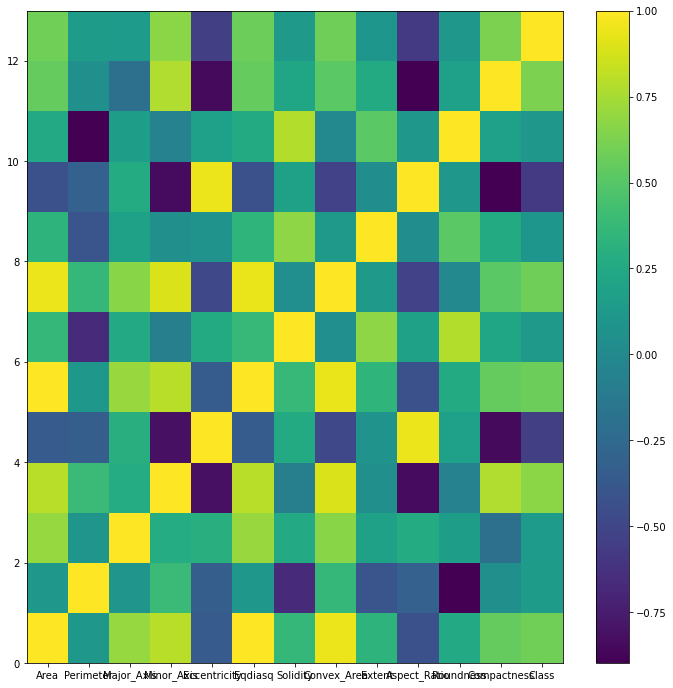

In [167]:
#sns.heatmap(df.corr())
plt.figure(figsize=(12, 12))
plt.pcolor(df.corr())
plt.xticks(np.arange(0.5, len(df.corr().columns), 1), df.corr().columns)
plt.xticks(np.arange(0.5, len(df.corr().index), 1), df.corr().index)
plt.colorbar()
plt.show()

In [168]:
df=df[['Minor_Axis',
       'Solidity', 'Extent',
       'Roundness', 'Compactness', 'Class']] 

<AxesSubplot:>

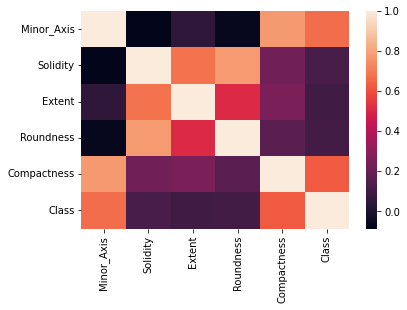

In [169]:
sns.heatmap(df.corr())

In [170]:
df=df[['Minor_Axis',
       'Solidity', 'Extent',
       'Roundness', 'Compactness', 'Class']] 

In [171]:
X_train, X_test, y_train, y_test = train_test_split(df[['Minor_Axis', 'Solidity', 'Extent', 'Roundness', 'Compactness']], df["Class"])

model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier()
model4 = RandomForestClassifier()
model5 = GradientBoostingClassifier()
model6 = xgb.XGBClassifier()
model7 = LGBMClassifier()

model1.fit(X_train,  y_train)
model2.fit(X_train,  y_train)
model3.fit(X_train,  y_train)
model4.fit(X_train,  y_train)
model5.fit(X_train,  y_train)
model6.fit(X_train,  y_train)
model7.fit(X_train,  y_train)

LGBMClassifier()

In [172]:
predict1=model1.predict(X_train)
predict2=model2.predict(X_train)
predict3=model3.predict(X_train)
predict4=model4.predict(X_train)
predict5=model5.predict(X_train)
predict6=model6.predict(X_train)
predict7=model7.predict(X_train)

In [173]:
predict_avg=np.round((predict1+predict2+predict3+predict4+predict5+predict6+predict7))

In [174]:
score = 0
for a, i in enumerate(predict_avg):
    if y_train.reset_index(drop = True)[a] == i:
        score += 1
    else:
        pass
score/len(y_train)

0.489137181874612

<BarContainer object of 7 artists>

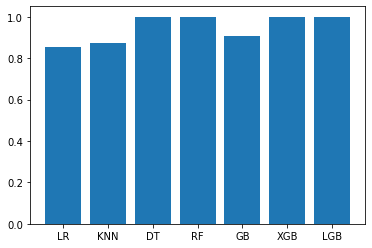

In [175]:
model_name=["LR", "KNN", "DT", "RF", "GB","XGB","LGB"]
scores = [model1.score(X_train, y_train), model2.score(X_train, y_train)
        , model3.score(X_train, y_train), model4.score(X_train, y_train)
        ,model5.score(X_train, y_train), model6.score(X_train, y_train)
        ,model7.score(X_train, y_train)]
plt.bar(model_name, scores)

In [176]:
predict_avg=np.round((predict1+predict2+predict3+predict4+predict5+predict6+predict7))

In [177]:
score = 0
for a, i in enumerate(predict_avg):
    if y_train.reset_index(drop = True)[a] == i:
        score += 1
    else:
        pass
score/len(y_train)

0.489137181874612

In [184]:
X_train, X_test, y_train, y_test = train_test_split(df[['Minor_Axis', 'Solidity', 'Extent', 'Roundness', 'Compactness']], df["Class"])

model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier()
model4 = RandomForestClassifier()
model5 = GradientBoostingClassifier()
model6 = xgb.XGBClassifier()
model7 = LGBMClassifier()

model1.fit(X_train,  y_train)
model2.fit(X_train,  y_train)
model3.fit(X_train,  y_train)
model4.fit(X_train,  y_train)
model5.fit(X_train,  y_train)
model6.fit(X_train,  y_train)
model7.fit(X_train,  y_train)

LGBMClassifier()

In [185]:
predict1 = model1.predict(X_test)
predict2 = model2.predict(X_test)
predict3 = model3.predict(X_test)
predict4 = model4.predict(X_test)
predict5 = model5.predict(X_test)
predict6 = model6.predict(X_test)
predict7 = model7.predict(X_test)

In [186]:
predict_avg=np.round((predict1+predict2+predict3+predict4+predict5+predict6+predict7))

In [187]:
score = 0
for a, i in enumerate(predict_avg):
    if y_train.reset_index(drop = True)[a] == i:
        score += 1
    else:
        pass
score/len(y_test)

0.25884543761638734

<BarContainer object of 7 artists>

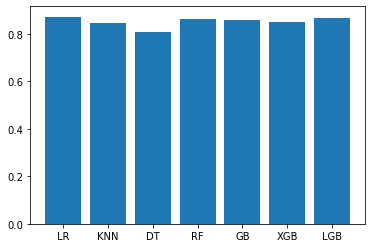

In [188]:
model_name=["LR", "KNN", "DT", "RF", "GB","XGB","LGB"]
scores2 = [model1.score(X_test, y_test), model2.score(X_test, y_test)
        , model3.score(X_test, y_test), model4.score(X_test, y_test)
        ,model5.score(X_test, y_test), model6.score(X_test, y_test)
        ,model7.score(X_test, y_test)]
plt.bar(model_name, scores2)

<BarContainer object of 7 artists>

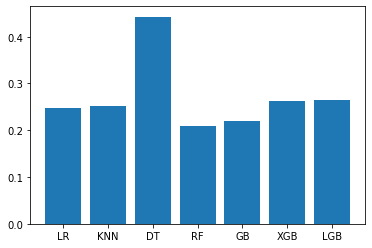

In [189]:
gap=[]
for a, i in enumerate(scores):
    gap.append((i - scores2[a])**2)
plt.bar(model_name, gap)

<BarContainer object of 7 artists>

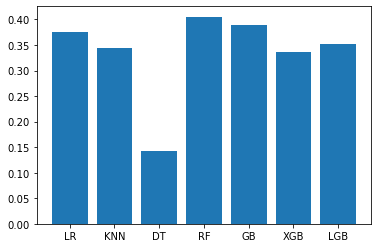

In [181]:
model_name=["LR", "KNN", "DT", "RF", "GB","XGB","LGB"]
scores = [r2_score(y_test, predict1), r2_score(y_test, predict2)
        , r2_score(y_test, predict3), r2_score(y_test, predict4)
        ,r2_score(y_test, predict5), r2_score(y_test, predict6)
        ,r2_score(y_test, predict7)]
plt.bar(model_name, scores)

In [182]:
"""
#함수없이 하는 법
for a, b in enumerate(df["Class"].unique()):
        df.loc[df["Class"] == b, "Class"] = int(a)
"""

'\n#함수없이 하는 법\nfor a, b in enumerate(df["Class"].unique()):\n        df.loc[df["Class"] == b, "Class"] = int(a)\n'

In [183]:
df.corrwith(df["Class"]).sort_values(ascending=False)

Class          1.000000
Minor_Axis     0.668126
Compactness    0.624939
Solidity       0.125347
Roundness      0.105768
Extent         0.100200
dtype: float64